In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, precision_recall_curve, recall_score, roc_curve, auc, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
data = load_svmlight_file('data/demo-g1.txt')
X,y=data[0],data[1]
X_s,y_s=resample(X,y,n_samples=150000,replace=False)
X_train,X_test,y_train,y_test = train_test_split(X_s,y_s,test_size=.3,random_state=42)

In [4]:
rfc = RandomForestClassifier(n_estimators=300,max_depth=None,n_jobs=-1,verbose=1)

In [5]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 42.7min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [17]:
def model_eva(model,X_test,y_test):
    y_test_pred_proba=model.predict_proba(X_test)
    y_test_pred=model.predict(X_test)
    fpr,tpr,threshold=roc_curve(y_test,y_test_pred_proba[:,0],pos_label=1)
    print('precision_score:',precision_score(y_test,y_test_pred))
    print('auc:',auc(fpr,tpr))
    print(confusion_matrix(y_test,y_test_pred).T)
    plt.plot(fpr,tpr)
    plt.xlabel('fpt')
    plt.ylabel('tpr')
    plt.title('RoC')
    print(np.unique(y_test,return_counts=True))
    print(np.unique(y_test_pred,return_counts=True))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:   10.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    7.3s finished


precision_score: 0.7698078542448136
auc: 0.8286711572528995
[[20112  6014]
 [ 5405 13469]]
(array([1., 2.]), array([25517, 19483]))
(array([1., 2.]), array([26126, 18874]))


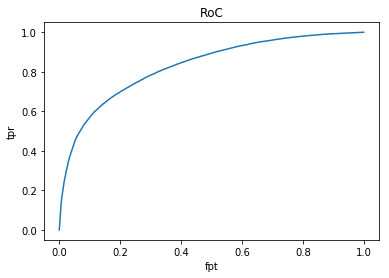

In [18]:
model_eva(rfc,X_test,y_test)

In [15]:
rfc_200_20 = RandomForestClassifier(n_estimators=200,max_depth=20,n_jobs=-1,verbose=1)
rfc_200_20.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   38.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.9s finished


precision_score: 0.647783320650489
auc: 0.7758014126710924
[[22984 12497]
 [ 2533  6986]]
(array([1., 2.]), array([25517, 19483]))
(array([1., 2.]), array([35481,  9519]))


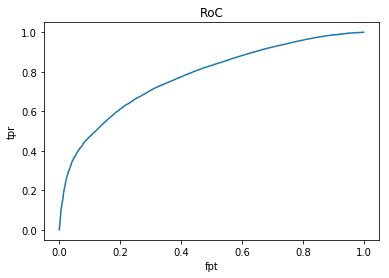

In [19]:
model_eva(rfc_200_20,X_test,y_test)

In [34]:
print(rfc.feature_importances_.shape)
index = np.arange(18338)
value=zip(index,rfc.feature_importances_)
l=sorted(value,key=lambda x:x[1],reverse=True)
r=l[:100]
mat_index=map(lambda x:x[0],r)
X_s_compact=X_s[:,list(mat_index)]
X_train,X_test,y_train,y_test = train_test_split(X_s_compact,y_s,test_size=.3,random_state=42)
X_train.shape

(18338,)


(105000, 100)

In [29]:
rfc_200_20_imp = RandomForestClassifier(n_estimators=200,max_depth=20,n_jobs=-1,verbose=1)
rfc_200_20_imp.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.8s finished


precision_score: 0.758581620549861
auc: 0.7896915315156114
[[42850 13637]
 [16582 31931]]
(array([1., 2.]), array([59432, 45568]))
(array([1., 2.]), array([56487, 48513]))


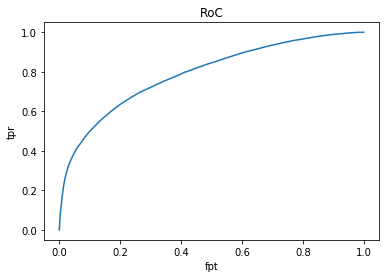

In [35]:
model_eva(rfc_200_20_imp,X_train,y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.8s finished


precision_score: 0.7614373648311429
auc: 0.7911289888970688
[[18308  5736]
 [ 7145 13811]]
(array([1., 2.]), array([25453, 19547]))
(array([1., 2.]), array([24044, 20956]))


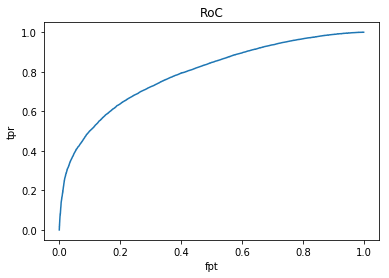

In [36]:
model_eva(rfc_200_20_imp,X_test,y_test)

In [42]:
data = load_svmlight_file('data/demo-g1-v2.txt')
X,y=data[0],data[1]
X_s,y_s=resample(X,y,n_samples=150000,replace=False)
X_train,X_test,y_train,y_test = train_test_split(X_s,y_s,test_size=.3,random_state=42)

In [38]:
rfc = RandomForestClassifier(n_estimators=300,max_depth=None,n_jobs=-1,verbose=1)

In [39]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.4min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    9.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    7.1s finished


precision_score: 0.734266252036132
auc: 0.7620832821147558
[[19834  7178]
 [ 6205 11783]]
(array([1., 2.]), array([26039, 18961]))
(array([1., 2.]), array([27012, 17988]))


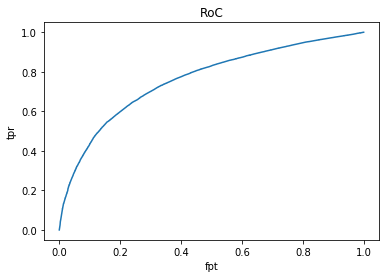

In [40]:
model_eva(rfc,X_test,y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   29.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.7s finished


precision_score: 0.6349744014066298
auc: 0.7731091162827872
[[24557 14117]
 [ 1426  4900]]
(array([1., 2.]), array([25983, 19017]))
(array([1., 2.]), array([38674,  6326]))


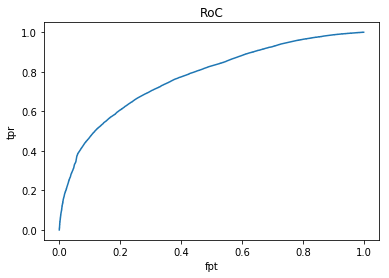

In [43]:
rfc_200_20 = RandomForestClassifier(n_estimators=200,max_depth=20,n_jobs=-1,verbose=1)
rfc_200_20.fit(X_train,y_train)
model_eva(rfc_200_20,X_test,y_test)

In [ ]:
print(rfc.feature_importances_.shape)
index = np.arange(18338)
value=zip(index,rfc.feature_importances_)
l=sorted(value,key=lambda x:x[1],reverse=True)
r=l[:100]
mat_index=map(lambda x:x[0],r)
X_s_compact=X_s[:,list(mat_index)]
X_train,X_test,y_train,y_test = train_test_split(X_s_compact,y_s,test_size=.3,random_state=42)
X_train.shape

In [44]:
X.shape

(190063, 7672)